<font color = "Brown" > <h1> BIKE SHARING CASE STUDY - MLR </h1> </font>

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. 

So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end. BoomBikes aspires to understand the demand for shared bikes among the people.

**Objective**

- To understand the factors on which the demand for these shared bikes depends. 
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

## Step - 1 Reading and Understanding the Data

In [234]:
# imporing the necessary libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [235]:
# Reding the data from csv file

bike_df = pd.read_csv("day.csv")

In [236]:
# check the head of the dataset

bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [237]:
# getting the info abt the columns

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [238]:
# no. of row and columns of dataSET

bike_df.shape

(730, 16)

In [239]:
bike_df.columns  # what all columns are present 

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [240]:
# checking for the null values in column data if any

bike_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- <font color = green>No null values are present </font>

In [241]:
# dropping the duplicates if present

bike_df.drop_duplicates(inplace=True)

In [242]:
# re-verifying the shape 

bike_df.shape

(730, 16)

- <font color = green> Shape is same after dropping duplicates, that means there are no duplicates</font>

In [243]:
# statistical info abt the numerical columns

bike_df[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']].describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [244]:
# dropping columns 
# "instant" only giving us index of the rows
# "dteday" is data but month ,year and weekday is already present in dataset
# "casual" and "registered" are the breakup of the target variable "cnt"

bike_df = bike_df.drop(["instant", "dteday", "casual", "registered"], axis = 1)

In [245]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [246]:
# mapping the season column
bike_df.season =bike_df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# mapping the month column
bike_df.mnth = bike_df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

# mapping the weekday column
bike_df.weekday =bike_df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

# mapping the weathersit column
bike_df.weathersit = bike_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [247]:
bike_df.info()  # getting info about the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


## Step 2: Visualising the Data

Analysing the categorical variables and how they effect "cnt"

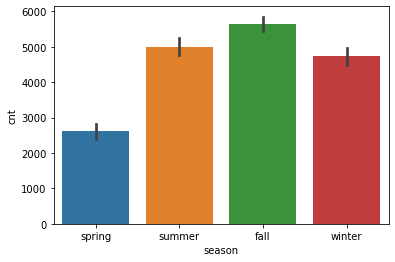

In [248]:
sns.barplot(bike_df["season"], bike_df["cnt"])
plt.show()

- <font color = green> Fall season has the more bookings</font>

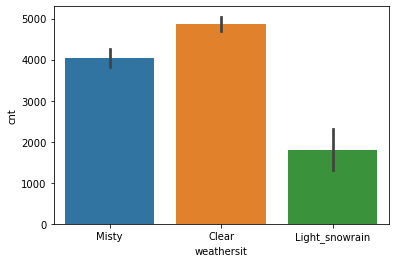

In [249]:
sns.barplot(bike_df["weathersit"], bike_df["cnt"])
plt.show()

- <font color = green> Clear weather has more bike rentals which is understood</font>

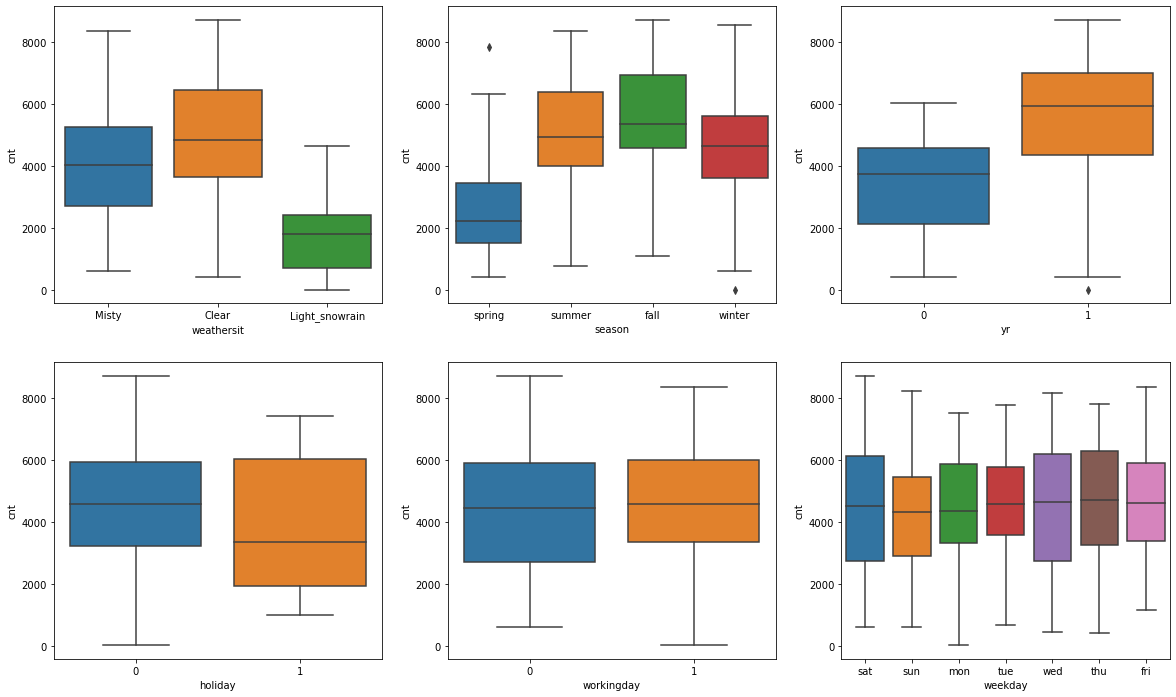

In [250]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x = "weathersit", y = "cnt", data = bike_df)
plt.subplot(2,3,2)
sns.boxplot(x = "season", y = "cnt", data = bike_df)
plt.subplot(2,3,3)
sns.boxplot(x = "yr", y = "cnt", data = bike_df)
plt.subplot(2,3,4)
sns.boxplot(x = "holiday", y = "cnt", data = bike_df)
plt.subplot(2,3,5)
sns.boxplot(x = "workingday", y = "cnt", data = bike_df)
plt.subplot(2,3,6)
sns.boxplot(x = "weekday", y = "cnt", data = bike_df)
plt.show()

- <font color = green> The no. of booking goes down when the weather situation is Light snow rain</font>
- <font color = green>For year 2019 their is a significant increase in the booking as compared to 2018 </font>
- <font color = green> The median value of the rentals are significantly higher when there is no holiday.</font>

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

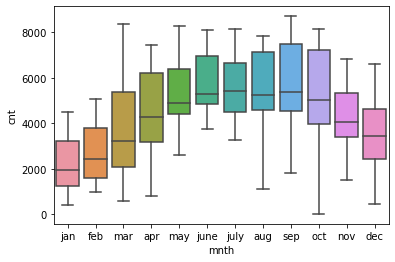

In [251]:
sns.boxplot(x = "mnth", y = "cnt", data = bike_df)

- <font color = green> Mid year specially "september" experience maximum riding  </font>

**yr : year (0: 2018, 1:2019)**

<AxesSubplot:xlabel='cnt', ylabel='Density'>

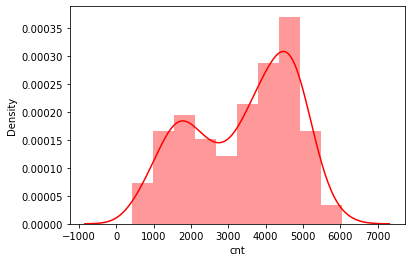

In [252]:
# for 2018
sns.distplot(bike_df.cnt[bike_df["yr"] == 0], bins = 10 ,color = "r")

<AxesSubplot:xlabel='cnt', ylabel='Density'>

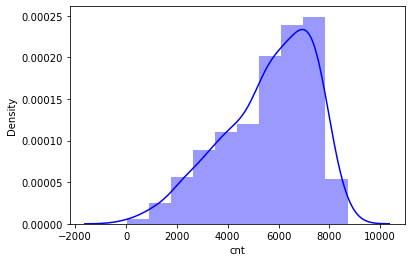

In [253]:
# for 2019
sns.distplot(bike_df.cnt[bike_df["yr"] == 1], bins = 10 ,color = "b")

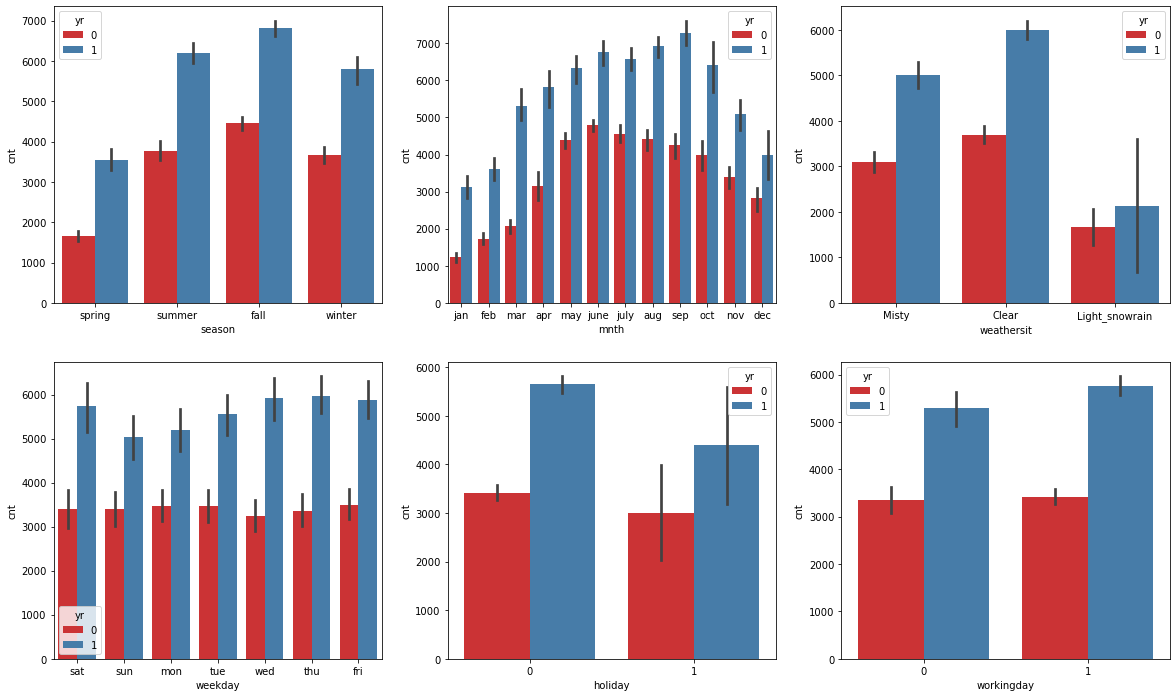

In [254]:
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.barplot("season",'cnt',data=bike_df, hue='yr',palette='Set1')

plt.subplot(2,3,2)
sns.barplot("mnth",'cnt',data=bike_df, hue='yr',palette='Set1')

plt.subplot(2,3,3)
sns.barplot('weathersit','cnt',data=bike_df, hue='yr',palette='Set1')

plt.subplot(2,3,4)
sns.barplot('weekday','cnt',data=bike_df, hue='yr',palette='Set1')

plt.subplot(2,3,5)
sns.barplot('holiday','cnt',data=bike_df, hue='yr',palette='Set1')

plt.subplot(2,3,6)
sns.barplot('workingday','cnt',data=bike_df, hue='yr',palette='Set1')

plt.show()

- <font color = green> In each season the booking count has increased significantly from 2018 to 2019.</font>
- <font color = green> Most of the bookings has been done during the month of may, june, july, aug, sep and oct.Trend increased starting of the year tillmid of the year and then it started decreasing in the end of year.2019 has seen more no of rentals as compared to the previous year.</font>
- <font color = green> In comparison to previous year, i.e 2018, booking increased for each weather situation in 2019.</font>
- <font color = green>wed ,Thu, Fir, Sat  have more number of bookings as compared to the start of the week.</font>
- <font color = green>When its holiday, booking seems less in number which seems reasonable maybe people want to stay at home and relax.</font>
- <font color = green> Booking seems almost equal irrespective of the workingday or not . The count increased from 2018 to 2019 on working days.</font>

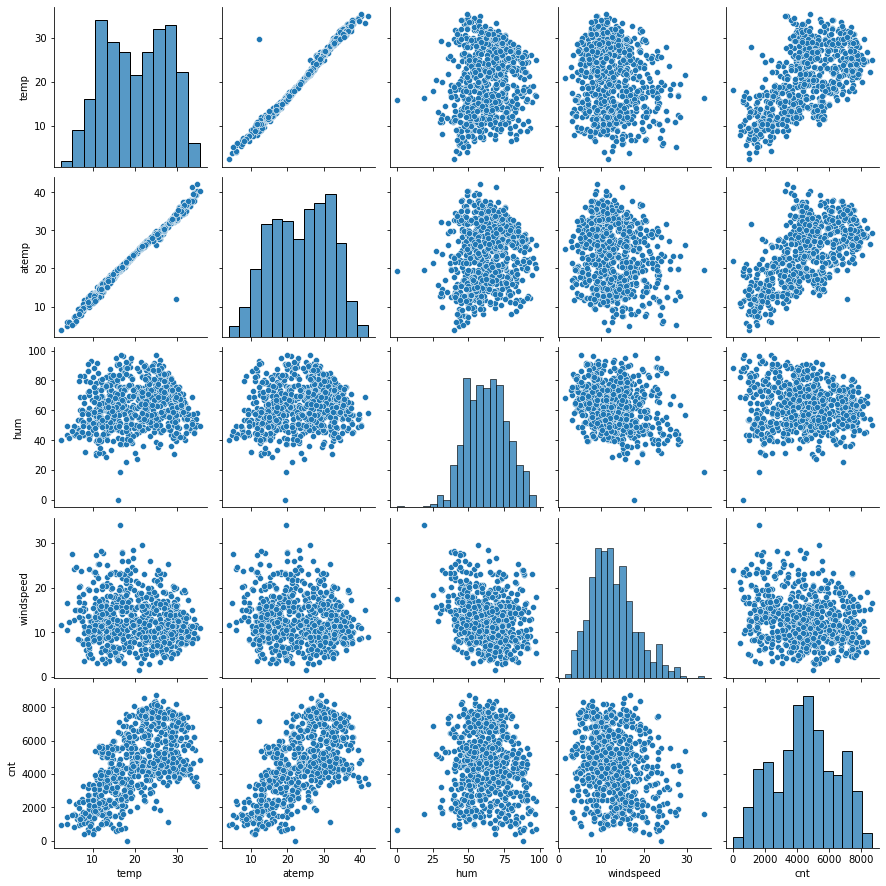

In [255]:
# Analysing Numerical Variable
sns.pairplot(bike_df[["temp", "atemp", "hum", "windspeed", "cnt"]])


- <font color = "green" >temp, atemp has some sought of corelation with target variable and it may be a strong driving variable for booking. </font>


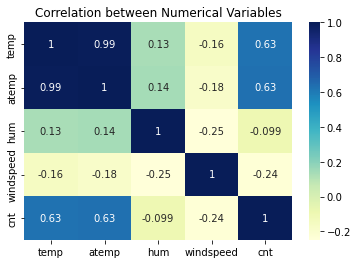

In [256]:
sns.heatmap(bike_df[["temp", "atemp", "hum", "windspeed", "cnt"]].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation between Numerical Variables")
plt.show()

**There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables**

## Step 3: Preparing data 

In [257]:
#creating dummy vars for season
season_dummy = pd.get_dummies(bike_df["season"], drop_first = True)
season_dummy.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [258]:
# Dummy variable creation for month, weekday, weathersit  variables.

months_dummy=pd.get_dummies(bike_df.mnth,drop_first=True)
weekdays_dummy=pd.get_dummies(bike_df.weekday,drop_first=True)
weathersit_dummy=pd.get_dummies(bike_df.weathersit,drop_first=True)


In [259]:
# Concatenating the dummy data frame with the main data set bike_df

bike_df = pd.concat([bike_df,season_dummy, weathersit_dummy, months_dummy, weekdays_dummy] , axis=1)
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,0,0,0,0,0,1,0,0,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,1,0,0,0,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,0,1,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [260]:
# dropping unnecessary columns as we have already created dummy variable out of it.

bike_df = bike_df.drop(["season", "weathersit", 'mnth','weekday'], axis =1)
bike_df

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,0,1,10.420847,11.33210,65.2917,23.458911,2114,1,0,...,0,0,0,0,0,0,0,1,0,0
726,1,0,1,10.386653,12.75230,59.0000,10.416557,3095,1,0,...,0,0,0,0,0,0,0,0,0,0
727,1,0,0,10.386653,12.12000,75.2917,8.333661,1341,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.58500,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,0,0


In [261]:
# check the column info of dataframe 

bike_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   yr              730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   hum             730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   spring          730 non-null    uint8  
 9   summer          730 non-null    uint8  
 10  winter          730 non-null    uint8  
 11  Light_snowrain  730 non-null    uint8  
 12  Misty           730 non-null    uint8  
 13  aug             730 non-null    uint8  
 14  dec             730 non-null    uint8  
 15  feb             730 non-null    uint8  
 16  jan             730 non-null    uint8  
 17  july            730 non-null    uin

## Step 4 : Splitting Data into Training & Testing Sets

In [262]:
# train test split

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bike_df,train_size = 0.7, test_size = 0.3, random_state = 100)

# Checking the shape of the trainng dataset

df_train.shape

(510, 30)

In [263]:
# Using MinMaxScaler to Rescaling the features

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [264]:
# checking the head of the dataset to chokout the variable the need to be scaled
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,1,0,0,0,0


In [265]:
# forming the list of the variables we will be scaling excluding the dummy- variables

list_to_scale = [ "temp", "atemp", "hum", "windspeed","cnt"]

In [266]:
df_train[list_to_scale] = scaler.fit_transform(df_train[list_to_scale])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,1,0,0,0,0


In [267]:
# statistically describing the dataset

df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.084314,0.086275,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.278131,0.281045,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


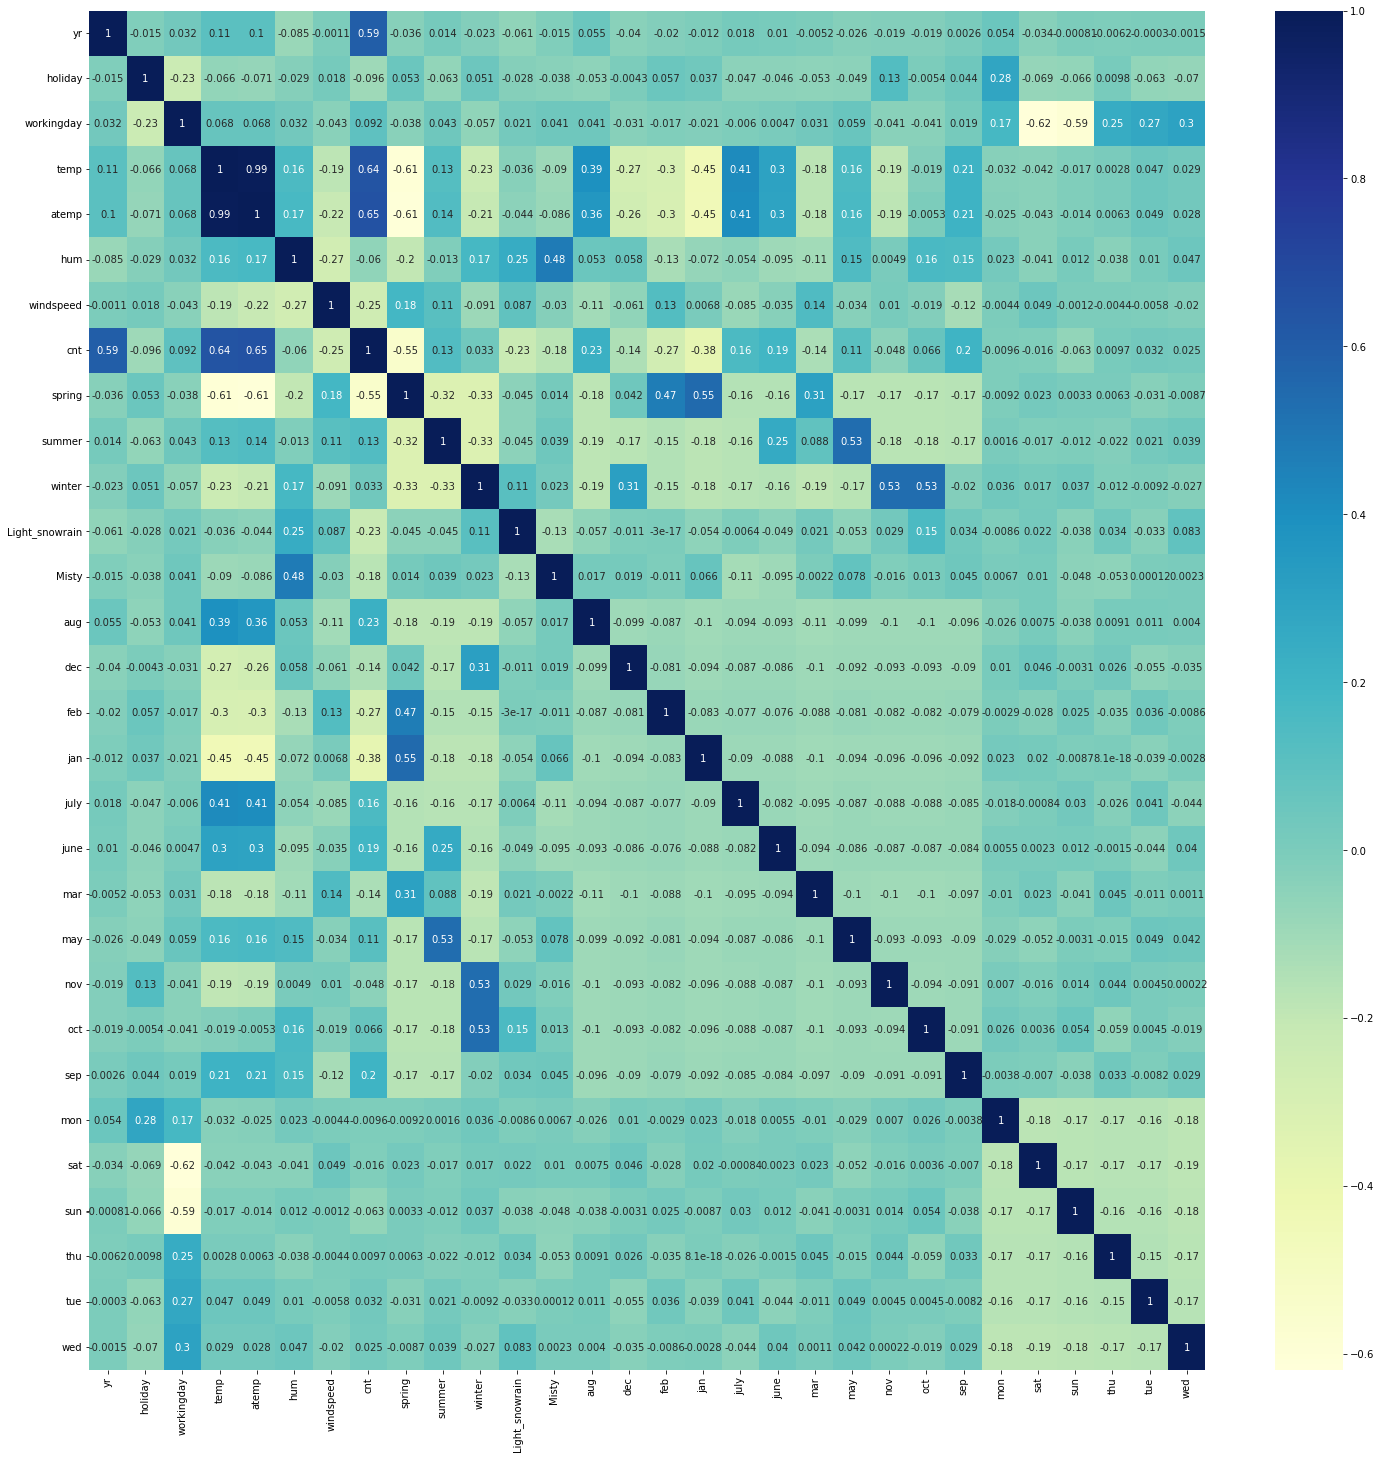

In [268]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize =(25,25))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

- cnt seems to have positive correlation with year and temp variable. 
- Misty and humidity show correlation. 
- Spring season with Jan and Feb month
- Summer season with may month and Winter season with oct and nov month show good correlation

In [269]:
# Building the Linear Model

y_train = df_train.pop("cnt")
y_train  # target variable

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [270]:
X_train = df_train
X_train # independent variables

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0,0,1,...,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,0.824514,0.762183,0.605840,0.355596,0,1,0,...,0,0,0,0,1,0,0,0,0,0
578,1,0,1,0.863973,0.824359,0.679690,0.187140,0,0,0,...,0,0,0,0,0,0,0,1,0,0
53,0,0,1,0.202618,0.218747,0.435939,0.111379,1,0,0,...,0,0,0,0,0,0,0,0,0,1
350,0,0,0,0.248216,0.223544,0.577930,0.431816,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [271]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [272]:
# Recursive feature elimination

lm  = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=15)     #running RFE
rfe = rfe.fit(X_train, y_train)


In [273]:
# Ranking of the variables

list(zip(X_train.columns,rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('aug', False, 4),
 ('dec', True, 1),
 ('feb', False, 3),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 5),
 ('mar', False, 15),
 ('may', False, 14),
 ('nov', True, 1),
 ('oct', False, 7),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12)]

In [274]:
# list of selected 15 variables 

col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'Light_snowrain', 'Misty', 'dec', 'jan', 'july', 'nov', 'sep', 'sat'],
      dtype='object')

In [275]:
# Rejected columns

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'summer', 'aug', 'feb', 'june', 'mar', 'may',
       'oct', 'mon', 'sun', 'thu', 'tue', 'wed'],
      dtype='object')

- We can see atemp is automatically rejected by RFE

## Step 5: Building a linear Model

In [276]:
import statsmodels.api as sm

In [277]:
# adding a constant 
X_train_sm = sm.add_constant(X_train[col])

Building the 1st model taking all the 15 variables selected with RFE

In [278]:
#model1

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     178.3
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          2.93e-188
Time:                        00:11:25   Log-Likelihood:                 512.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     494   BIC:                            -925.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3623      0.032     11.393      0.000       0.300       0.425
yr                 0.2317      0.008     28.561      0.000       0.216       0.248
holiday           -0.0876      0.026     -3.400      0.001      -0.138      -0.037
temp               0.4344      0.033     13.188      0.000       0.370       0.499
hum               -0.1453      0.038     -3.848      0.000      -0.219      -0.071
windspeed         -0.1822      0.026     -7.079      0.000      -0.233      -0.132
spring            -0.1009      0.015     -6.551      0.000      -0.131      -0.071
winter             0.0732      0.014      5.188      0.000       0.046       0.101
Light_snowrain    -0.2552      0.026     -9.653      0.000      -0.307      -0.203
Misty             -0.0581      0.011     -5.526      0.000      -0.079      -0.037
dec               -0.0466      0.017     -2.697      0.007      -0.080      -0.013
jan               -0.0513      0.018     -2.848      0.005      -0.087      -0.016
july              -0.0723      0.017     -4.204      0.000      -0.106      -0.039
nov               -0.0491      0.019     -2.649      0.008      -0.085      -0.013
sep                0.0565      0.016      3.638      0.000       0.026       0.087
sat                0.0181      0.011      1.632      0.103      -0.004       0.040
==============================================================================
Omnibus:                       73.583   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.671
Skew:                          -0.739   Prob(JB):                     2.16e-40
Kurtosis:                       5.532   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [279]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [280]:
# Calculating the VIF for checking the multicolinearity

X_model1_train = X_train[col]
vif = pd.DataFrame()
vif["Features"] = X_model1_train.columns
vif["VIF"] = [variance_inflation_factor(X_model1_train.values, i) for i in range(X_model1_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.57
2,temp,16.88
4,windspeed,4.10
6,winter,2.98
5,spring,2.94
8,Misty,2.26
0,yr,2.07
12,nov,1.82
10,jan,1.75
9,dec,1.54


we can clearly see p value of "sat" is high so we will drop the column

In [281]:
#model2

X_model2_train = X_model1_train.drop("sat", axis = 1)

X_train_sm = sm.add_constant(X_model2_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          7.80e-189
Time:                        00:11:25   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3665      0.032     11.546      0.000       0.304       0.429
yr                 0.2312      0.008     28.474      0.000       0.215       0.247
holiday           -0.0905      0.026     -3.517      0.000      -0.141      -0.040
temp               0.4345      0.033     13.169      0.000       0.370       0.499
hum               -0.1486      0.038     -3.936      0.000      -0.223      -0.074
windspeed         -0.1808      0.026     -7.015      0.000      -0.231      -0.130
spring            -0.1008      0.015     -6.537      0.000      -0.131      -0.071
winter             0.0737      0.014      5.216      0.000       0.046       0.102
Light_snowrain    -0.2538      0.026     -9.588      0.000      -0.306      -0.202
Misty             -0.0574      0.011     -5.461      0.000      -0.078      -0.037
dec               -0.0455      0.017     -2.635      0.009      -0.079      -0.012
jan               -0.0507      0.018     -2.810      0.005      -0.086      -0.015
july              -0.0720      0.017     -4.180      0.000      -0.106      -0.038
nov               -0.0494      0.019     -2.664      0.008      -0.086      -0.013
sep                0.0568      0.016      3.656      0.000       0.026       0.087
==============================================================================
Omnibus:                       67.521   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.080
Skew:                          -0.665   Prob(JB):                     5.82e-39
Kurtosis:                       5.553   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [282]:
vif = pd.DataFrame()
vif["Features"] = X_model2_train.columns
vif["VIF"] = [variance_inflation_factor(X_model2_train.values, i) for i in range(X_model2_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.57
2,temp,16.83
4,windspeed,4.07
6,winter,2.97
5,spring,2.94
8,Misty,2.26
0,yr,2.07
12,nov,1.82
10,jan,1.74
9,dec,1.54


In [283]:
#Dropping the variable "dec" from the model have high p value

X_model3_train = X_model2_train.drop("dec", axis = 1)
#model3
X_train_sm = sm.add_constant(X_model3_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          1.67e-188
Time:                        00:11:25   Log-Likelihood:                 507.55
No. Observations:                 510   AIC:                            -987.1
Df Residuals:                     496   BIC:                            -927.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3532      0.032     11.203      0.000       0.291       0.415
yr                 0.2311      0.008     28.293      0.000       0.215       0.247
holiday           -0.0916      0.026     -3.538      0.000      -0.142      -0.041
temp               0.4582      0.032     14.345      0.000       0.395       0.521
hum               -0.1566      0.038     -4.136      0.000      -0.231      -0.082
windspeed         -0.1755      0.026     -6.790      0.000      -0.226      -0.125
spring            -0.1012      0.016     -6.521      0.000      -0.132      -0.071
winter             0.0622      0.014      4.601      0.000       0.036       0.089
Light_snowrain    -0.2467      0.026     -9.315      0.000      -0.299      -0.195
Misty             -0.0557      0.011     -5.277      0.000      -0.076      -0.035
jan               -0.0395      0.018     -2.241      0.025      -0.074      -0.005
july              -0.0759      0.017     -4.398      0.000      -0.110      -0.042
nov               -0.0312      0.017     -1.800      0.072      -0.065       0.003
sep                0.0597      0.016      3.830      0.000       0.029       0.090
==============================================================================
Omnibus:                       59.405   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.947
Skew:                          -0.607   Prob(JB):                     3.35e-32
Kurtosis:                       5.312   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
vif = pd.DataFrame()
vif["Features"] = X_model3_train.columns
vif["VIF"] = [variance_inflation_factor(X_model3_train.values, i) for i in range(X_model3_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.27
2,temp,15.99
4,windspeed,4.07
5,spring,2.91
6,winter,2.59
8,Misty,2.24
0,yr,2.07
9,jan,1.66
11,nov,1.59
10,july,1.41


In [285]:
#Dropping the variable "nov" from the model considering the p - value

X_model4_train = X_model3_train.drop("nov", axis = 1)
#model4
X_train_sm = sm.add_constant(X_model4_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.5
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          5.52e-189
Time:                        00:11:25   Log-Likelihood:                 505.89
No. Observations:                 510   AIC:                            -985.8
Df Residuals:                     497   BIC:                            -930.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3474      0.031     11.052      0.000       0.286       0.409
yr                 0.2311      0.008     28.231      0.000       0.215       0.247
holiday           -0.0973      0.026     -3.780      0.000      -0.148      -0.047
temp               0.4644      0.032     14.592      0.000       0.402       0.527
hum               -0.1538      0.038     -4.055      0.000      -0.228      -0.079
windspeed         -0.1769      0.026     -6.835      0.000      -0.228      -0.126
spring            -0.0984      0.015     -6.359      0.000      -0.129      -0.068
winter             0.0529      0.013      4.225      0.000       0.028       0.078
Light_snowrain    -0.2456      0.027     -9.252      0.000      -0.298      -0.193
Misty             -0.0556      0.011     -5.252      0.000      -0.076      -0.035
jan               -0.0389      0.018     -2.200      0.028      -0.074      -0.004
july              -0.0769      0.017     -4.443      0.000      -0.111      -0.043
sep                0.0618      0.016      3.963      0.000       0.031       0.092
==============================================================================
Omnibus:                       56.577   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.510
Skew:                          -0.585   Prob(JB):                     3.75e-30
Kurtosis:                       5.238   Cond. No.                         18.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [286]:
vif = pd.DataFrame()
vif["Features"] = X_model4_train.columns
vif["VIF"] = [variance_inflation_factor(X_model4_train.values, i) for i in range(X_model4_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.25
2,temp,15.92
4,windspeed,4.03
5,spring,2.90
8,Misty,2.23
6,winter,2.11
0,yr,2.07
9,jan,1.66
10,july,1.41
7,Light_snowrain,1.21


In [287]:
#  we remove "jan"
X_model5_train = X_model4_train.drop("jan", axis = 1)

#model5
X_train_sm = sm.add_constant(X_model5_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     235.0
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          3.87e-189
Time:                        00:11:25   Log-Likelihood:                 503.41
No. Observations:                 510   AIC:                            -982.8
Df Residuals:                     498   BIC:                            -932.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3372      0.031     10.805      0.000       0.276       0.398
yr                 0.2303      0.008     28.053      0.000       0.214       0.246
holiday           -0.0981      0.026     -3.794      0.000      -0.149      -0.047
temp               0.4816      0.031     15.555      0.000       0.421       0.542
hum               -0.1582      0.038     -4.162      0.000      -0.233      -0.084
windspeed         -0.1701      0.026     -6.594      0.000      -0.221      -0.119
spring            -0.1069      0.015     -7.107      0.000      -0.136      -0.077
winter             0.0569      0.012      4.571      0.000       0.032       0.081
Light_snowrain    -0.2432      0.027     -9.135      0.000      -0.295      -0.191
Misty             -0.0557      0.011     -5.248      0.000      -0.077      -0.035
july              -0.0802      0.017     -4.638      0.000      -0.114      -0.046
sep                0.0610      0.016      3.899      0.000       0.030       0.092
==============================================================================
Omnibus:                       55.062   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.646
Skew:                          -0.565   Prob(JB):                     9.53e-30
Kurtosis:                       5.239   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [288]:
vif = pd.DataFrame()
vif["Features"] = X_model5_train.columns
vif["VIF"] = [variance_inflation_factor(X_model5_train.values, i) for i in range(X_model5_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.37
2,temp,15.27
4,windspeed,4.02
5,spring,2.54
8,Misty,2.23
6,winter,2.09
0,yr,2.06
9,july,1.40
7,Light_snowrain,1.21
10,sep,1.20


In [289]:
# lets see what will happen if we remove "hum" as it has very high VIF value
X_model6_train = X_model5_train.drop("hum", axis = 1)

#model6
X_train_sm = sm.add_constant(X_model6_train)

lr = sm.OLS(y_train, X_train_sm)

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     248.7
Date:                Tue, 20 Jun 2023   Prob (F-statistic):          1.16e-186
Time:                        00:11:26   Log-Likelihood:                 494.70
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     499   BIC:                            -920.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.024     10.530      0.000       0.205       0.299
yr                 0.2341      0.008     28.224      0.000       0.218       0.250
holiday           -0.0986      0.026     -3.752      0.000      -0.150      -0.047
temp               0.4515      0.031     14.758      0.000       0.391       0.512
windspeed         -0.1398      0.025     -5.559      0.000      -0.189      -0.090
spring            -0.1108      0.015     -7.265      0.000      -0.141      -0.081
winter             0.0473      0.012      3.804      0.000       0.023       0.072
Light_snowrain    -0.2864      0.025    -11.499      0.000      -0.335      -0.237
Misty             -0.0811      0.009     -9.182      0.000      -0.098      -0.064
july              -0.0727      0.017     -4.160      0.000      -0.107      -0.038
sep                0.0577      0.016      3.635      0.000       0.027       0.089
==============================================================================
Omnibus:                       58.020   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.195
Skew:                          -0.601   Prob(JB):                     9.80e-31
Kurtosis:                       5.249   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [290]:
vif = pd.DataFrame()
vif["Features"] = X_model6_train.columns
vif["VIF"] = [variance_inflation_factor(X_model6_train.values, i) for i in range(X_model6_train.shape[1])]
vif["VIF"] = round(vif["VIF"], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.60
3,windspeed,4.00
0,yr,2.06
4,spring,1.65
7,Misty,1.51
5,winter,1.40
8,july,1.35
9,sep,1.20
6,Light_snowrain,1.08
1,holiday,1.04


In [291]:
# Checking the parameters and their coefficient values

lr_model.params

const             0.251899
yr                0.234092
holiday          -0.098556
temp              0.451455
windspeed        -0.139817
spring           -0.110795
winter            0.047278
Light_snowrain   -0.286408
Misty            -0.081133
july             -0.072719
sep               0.057705
dtype: float64

<h3>We can cosider the above model i.e Model- 6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant.</h3>

<h3> F-Statistics value of 248.7 (which is greater than 1) and the p-value is 1.16e-186 i.e almost equals to zero, states that the overall model is significant. </h3>

## Step 6: Residual Analysis of the train data and validation

In [292]:
# Residual analysis

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

653    0.721404
576    0.744276
426    0.458083
728    0.393135
482    0.557132
         ...   
526    0.727371
578    0.849871
53     0.217005
350    0.269728
79     0.305552
Length: 510, dtype: float64

In [293]:
residual = y_train - y_train_pred

#### Normality of error terms

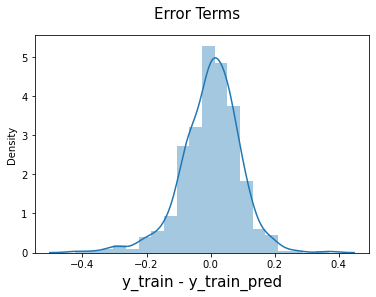

In [294]:
# PLot the histogram of the error terms 

fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

#### Homoscedasticity

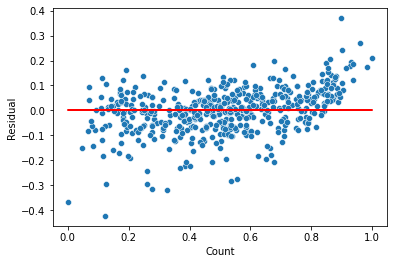

In [309]:
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

In [295]:
# final predictor variables

X_model6_train.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Light_snowrain', 'Misty', 'july', 'sep'],
      dtype='object')

## Step 7 Making Predictions using the Final Model

In [296]:
# Predictions and Evalution on the test set

variables_final = ['yr','holiday', 'temp', 'windspeed', 'spring', 'winter','Light_snowrain', 'Misty', 'july', 'sep']



In [297]:
# Appling scaling on the test dataset 

df_test[list_to_scale] = scaler.transform(df_test[list_to_scale])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,0,0,1,0,0


In [298]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,may,nov,oct,sep,mon,sat,sun,thu,tue,wed
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,...,0.086758,0.073059,0.082192,0.086758,0.127854,0.118721,0.146119,0.164384,0.164384,0.100457
std,0.500722,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,...,0.282125,0.260830,0.275286,0.282125,0.334692,0.324202,0.354034,0.371472,0.371472,0.301297
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [299]:
# defining X_test and y_test

y_test = df_test.pop("cnt")
X_test = df_test

In [300]:
X_test = X_test[variables_final]
X_test

,yr,holiday,temp,windspeed,spring,winter,Light_snowrain,Misty,july,sep
184,0,1,0.831783,0.084219,0,0,0,1,1,0
535,1,0,0.901354,0.153728,0,0,0,0,0,0
299,0,0,0.511964,0.334206,0,1,0,1,0,0
221,0,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0,0.817246,0.537414,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
400,1,0,0.257562,0.287411,1,0,0,1,0,0
702,1,0,0.519232,0.283397,0,1,0,0,0,0
127,0,0,0.584649,0.069510,0,0,0,0,0,0
640,1,0,0.745598,0.052115,0,1,0,1,0,0


In [301]:
# add a constant 
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,spring,winter,Light_snowrain,Misty,july,sep
184,1.0,0,1,0.831783,0.084219,0,0,0,1,1,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,1,0,1,0,0
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,0


In [302]:
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred

184    0.363229
535    0.871418
299    0.402446
221    0.602436
152    0.545710
         ...   
400    0.370156
702    0.728055
127    0.506124
640    0.781454
72     0.262347
Length: 219, dtype: float64

In [303]:
from sklearn.metrics import r2_score

In [304]:
# evaluation
r2 = r2_score(y_true = y_test, y_pred = y_test_pred)
r2

0.8070101019557963

#### R2 Score on test dataset is coming out to be 0.807 which is pretty good

## Step 8 Model Evaluation 

Plotting from actual values of y and predicted values 

Text(0, 0.5, 'y__testpred')

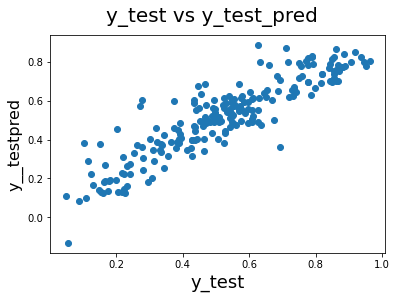

In [305]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y__testpred', fontsize = 16) 

In [306]:
# Parameters of the linear equation are :

lr_model.params

const             0.251899
yr                0.234092
holiday          -0.098556
temp              0.451455
windspeed        -0.139817
spring           -0.110795
winter            0.047278
Light_snowrain   -0.286408
Misty            -0.081133
july             -0.072719
sep               0.057705
dtype: float64

We can see that the equation of our best fitted line is:

$ cnt =  0.234 \times yr -0.098 \times holiday + 0.451 \times temp -0.139 \times windspeed -0.110 \times spring + 0.047 \times winter -0.286 \times Lightsnowrain -0.08 \times Misty - 0.07 \times july + 0.057 \times sep + 0.251 $

In [307]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7977


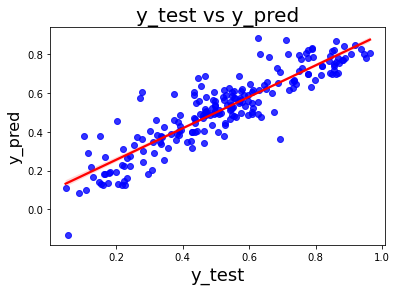

In [308]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

## Let's see how well our model performs and generalises with Training and Testing dataset:

- Train dataset R^2          : 
- Test dataset R^2           : 
- Train dataset Adjusted R^2 :    
- Test dataset Adjusted R^2  : 

Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring,  and winter, july.


## Takeaways and Conclusions for business

- Demand of Bikes is impacted positively by the year, temp , winter , sep - so at this time of the year demand will be more.
- Demand is Negatively imppacted by  holiday, windspeed ,Light_snowrain, Misty, spring, july so booking will be low at these time of the year 